In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [17]:
X,y=mnist['data'],mnist['target']


In [18]:
X.shape

(70000, 784)

In [19]:
y.shape

(70000,)

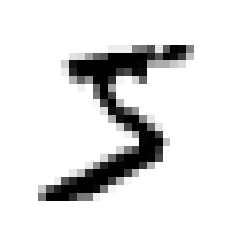

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

some_digit =X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [21]:
y[0]

'5'

In [22]:
#Label is in string so converting it into int
y=y.astype(np.uint8)

In [23]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [25]:
# Choose only 5 for training and test

y_train_5=(y_train ==5)
y_test_5=(y_test==5)

In [26]:
# Use SGD to train the model and classify the 5
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
sgd_clf.predict([some_digit])

array([ True])

In [28]:
#Now measure the performance for the classifier created above
#1. using CV method
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [30]:
#2. Confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

In [35]:
#3. Precision and recall 
from sklearn.metrics import precision_score,recall_score
print("Precision " ,precision_score(y_train_5,y_train_pred))
print("Recall ",recall_score(y_train_5,y_train_pred))


Precision  0.8370879772350012
Recall  0.6511713705958311


In [37]:
#4. F1 Score
from sklearn.metrics import f1_score
print("F1 Score ",f1_score(y_train_5,y_train_pred))

F1 Score  0.7325171197343846


In [46]:
#5. Precision/Recall Tradeoff
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)


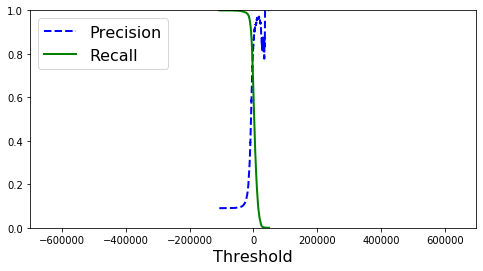

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

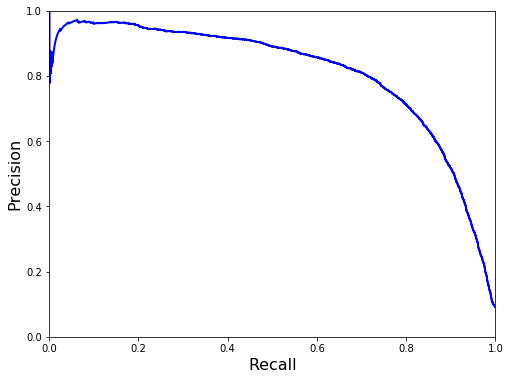

In [48]:
#6. Precision Vs Recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In the above two plots, below conclusions can be drawn :

1. Around 80% of the recall , precision start falling sharply , so we can take precision ~60 %.
2. For this example we are targetting for 90% of the precision ,and we will check the threshold fro 90% mark in the first plot which is 3371 (approx).We can check this using np.argmax.


In [52]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]
threshold_90_precision

3370.0194991439557

In [53]:
y_train_pred_90=(y_scores>=threshold_90_precision)


In [54]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [55]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [56]:
#7. ROC Curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)


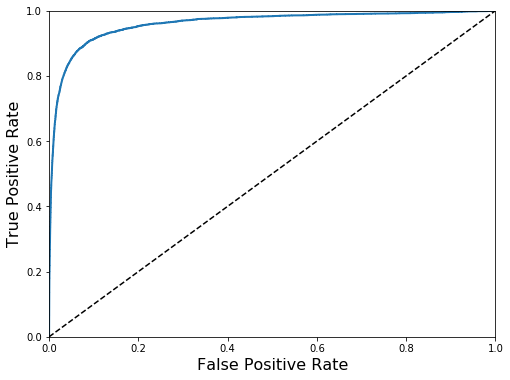

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [59]:
#calculate the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

# Algo :2 : Random Forest

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


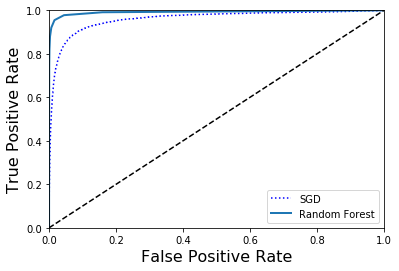

roc auc :  0.9920527492698306


In [63]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD") 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="lower right")
plt.show()
print("roc auc : ",roc_auc_score(y_train_5,y_scores_forest))